# Module III: Unveiling Connections with Knowledge Graph Visualization

**Objective:** This notebook introduces NetworkX, a Python library for the
creation, manipulation, and study of the structure, dynamics, and functions
of complex networks. We will focus on:
- Basic concepts: nodes, edges, and attributes.
- Building a simple knowledge graph from data.
- Visualizing the graph using different layouts.

**Libraries to be used:** NetworkX, Matplotlib

In [15]:
#-------------------------------------------------------------------------------
# 2. SETUP (Code Cell)
#-------------------------------------------------------------------------------
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd # For loading data from CSV if needed

print("Libraries imported successfully!")

Libraries imported successfully!


## 3.1 Introduction to Knowledge Graphs and NetworkX
A **Knowledge Graph** represents entities (nodes) and their relationships (edges)
in a structured way. NetworkX is a versatile tool for this.[24, 25, 26, 27]

- **Nodes:** Represent entities (e.g., people, concepts, items).
- **Edges:** Represent relationships between entities. Can be directed or undirected.
- **Attributes:** Nodes and edges can have attributes (e.g., type, weight, label).

In [16]:
#-------------------------------------------------------------------------------
# 3.2 Creating a Simple Graph (Code Cells)
#-------------------------------------------------------------------------------
# --- 3.2.1 Initialize a Graph ---
G_simple = nx.Graph() # For an undirected graph
# G_simple_directed = nx.DiGraph() # For a directed graph

In [17]:
# --- 3.2.2 Add Nodes ---
G_simple.add_node("Alice")
# G_simple.add_nodes_from()
G_simple.add_node("David", role="Developer") # Node with an attribute

print("Nodes in G_simple:", G_simple.nodes(data=True))

Nodes in G_simple: [('Alice', {}), ('David', {'role': 'Developer'})]


In [18]:
# --- 3.2.3 Add Edges ---
G_simple.add_edge("Alice", "Bob")
# G_simple.add_edges_from()
G_simple.add_edge("Charlie", "David", relationship="coworker", weight=0.8) # Edge with attributes

print("Edges in G_simple:", G_simple.edges(data=True))

Edges in G_simple: [('Alice', 'Bob', {}), ('David', 'Charlie', {'relationship': 'coworker', 'weight': 0.8})]


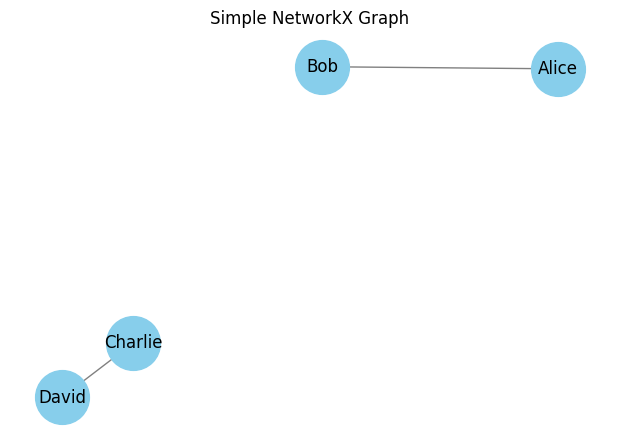

In [19]:
# --- 3.2.4 Basic Visualization ---
plt.figure(figsize=(6, 4))
nx.draw(G_simple, with_labels=True, node_color='skyblue', node_size=1500, edge_color='gray')
plt.title("Simple NetworkX Graph")
plt.show()

## 4.1 Hands-on: Character Relationships
Let's create a small knowledge graph representing relationships between
characters in a fictional work (e.g., a subset of Game of Thrones characters).
We'll use a predefined edgelist.
(Data could come from a CSV, e.g., a simplified version of `got-edges.csv` from
Melanie Walsh's datasets)

In [20]:
#-------------------------------------------------------------------------------
# 4.2 Task: Character Network (Code Cells)
#-------------------------------------------------------------------------------
# --- 4.2.1 Prepare/Load Data ---
# For a workshop, provide a small, direct edgelist or a simple CSV.
# Example edgelist (Source, Target, Weight/Relationship_Type)
# This is a highly simplified example.
character_df = pd.read_csv('got-edges.csv')

In [21]:
# --- 4.2.2 Build the Graph ---
G_chars = nx.from_pandas_edgelist(character_df, 'Source', 'Target', edge_attr='Weight')

print("Nodes in Character Graph:", G_chars.nodes())
print("Edges in Character Graph (with data):", list(G_chars.edges(data=True))[:3]) # Print first 3 for brevity

Nodes in Character Graph: ['Aemon', 'Grenn', 'Samwell', 'Aerys', 'Jaime', 'Robert', 'Tyrion', 'Tywin', 'Alliser', 'Mance', 'Amory', 'Oberyn', 'Arya', 'Anguy', 'Beric', 'Bran', 'Brynden', 'Cersei', 'Gendry', 'Gregor', 'Joffrey', 'Jon', 'Rickon', 'Roose', 'Sandor', 'Thoros', 'Balon', 'Loras', 'Belwas', 'Barristan', 'Illyrio']
Edges in Character Graph (with data): [('Aemon', 'Grenn', {'Weight': 5}), ('Aemon', 'Samwell', {'Weight': 31}), ('Aerys', 'Jaime', {'Weight': 18})]


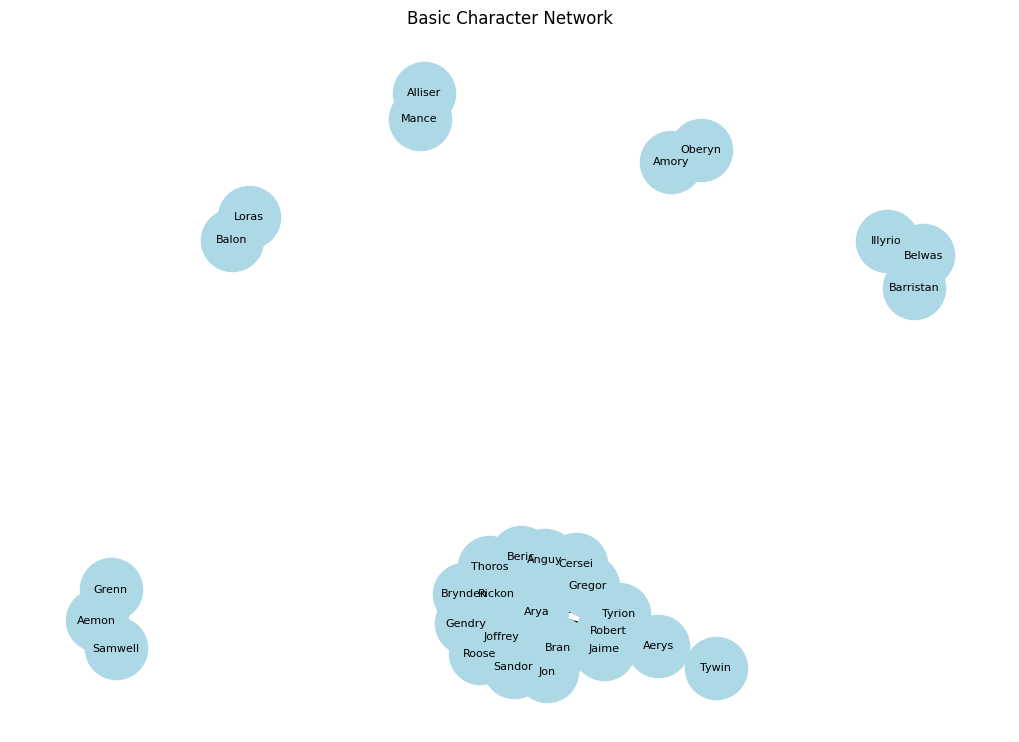

In [22]:
# --- 4.2.3 Basic Visualization with Labels ---
plt.figure(figsize=(10, 7))
nx.draw(G_chars, with_labels=True, node_color='lightblue', node_size=2000, font_size=8)
plt.title("Basic Character Network")
plt.show()

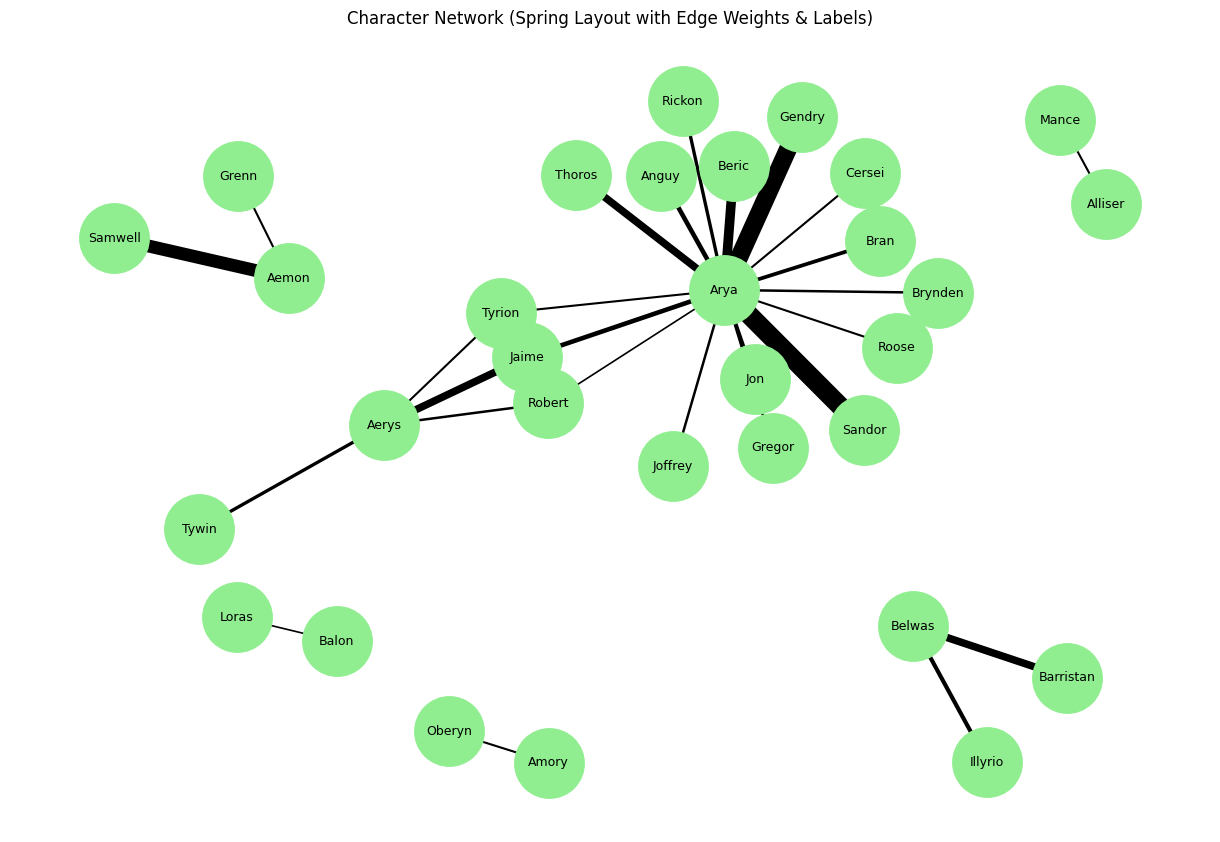

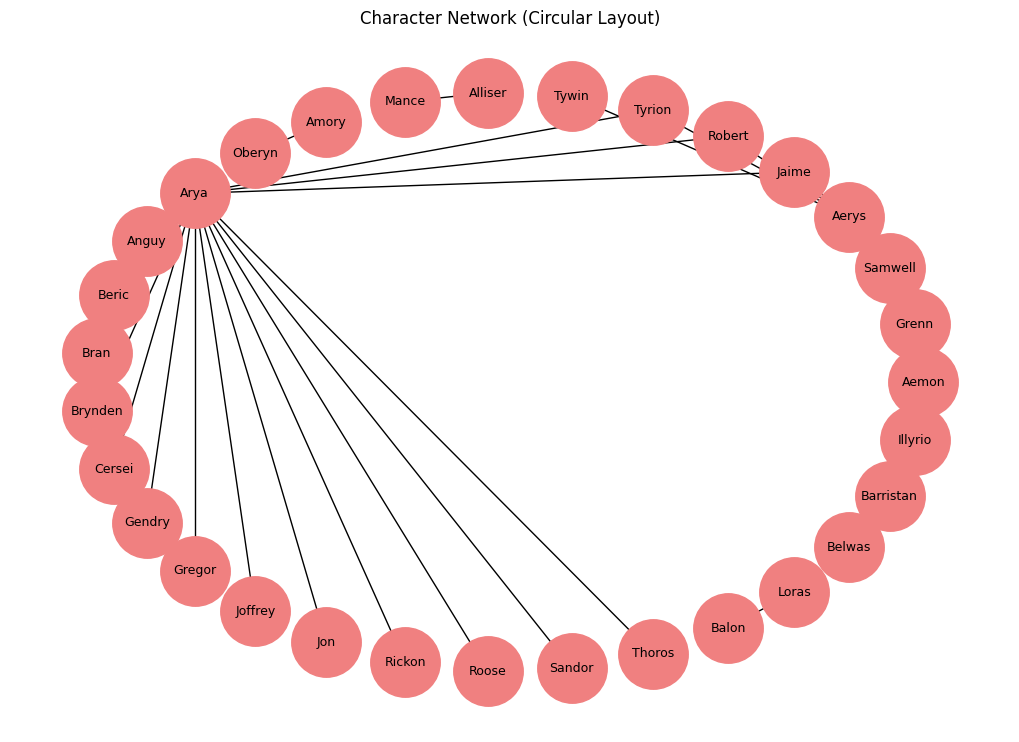

In [23]:
# --- 4.2.4 Exploring Layout Algorithms ---
"""
NetworkX offers various layout algorithms to position nodes.[25, 26]
Some common ones:
- `nx.spring_layout(G)`: Force-directed, good for showing community structure.
- `nx.circular_layout(G)`: Nodes on a circle.
- `nx.random_layout(G)`: Random positions.
- `nx.shell_layout(G)`: Nodes in concentric shells.
"""
plt.figure(figsize=(12, 8))
pos_spring = nx.spring_layout(G_chars, k=0.5, iterations=50) # k adjusts spacing
nx.draw(G_chars, pos_spring, with_labels=True, node_color='lightgreen', node_size=2500, font_size=9, width=[d['Weight']*0.3 for u,v,d in G_chars.edges(data=True)])
# Extract edge labels for drawing
edge_labels = {(u, v): d.get('relation', '') for u, v, d in G_chars.edges(data=True)} # Use relation if available
nx.draw_networkx_edge_labels(G_chars, pos_spring, edge_labels=edge_labels, font_size=7)
plt.title("Character Network (Spring Layout with Edge Weights & Labels)")
plt.show()

plt.figure(figsize=(10, 7))
pos_circular = nx.circular_layout(G_chars)
nx.draw(G_chars, pos_circular, with_labels=True, node_color='lightcoral', node_size=2500, font_size=9)
plt.title("Character Network (Circular Layout)")
plt.show()

In [24]:
# --- 4.2.5 Basic Styling (Optional) ---
# Example: Node size by degree, node color by a hypothetical attribute
# degrees = dict(G_chars.degree())
# node_sizes = [v * 300 for v in degrees.values()]
# node_colors = ['red' if G_chars.degree(node) > 2 else 'blue' for node in G_chars.nodes()]

# plt.figure(figsize=(12, 8))
# nx.draw(G_chars, pos_spring, with_labels=True, node_size=node_sizes, node_color=node_colors, font_size=9)
# plt.title("Styled Character Network (Size by Degree, Color by Condition)")
# plt.show()

## 5. Applications

Knowledge graph visualizations are useful for:
- **Research:**
    - Mapping citation networks or co-authorship patterns.[25]
    - Visualizing conceptual relationships in texts or ontologies.[25, 30]
    - Analyzing social networks, organizational structures.
    - Exploring biological pathways or molecular interactions.
- **Teaching:**
    - Explaining complex systems and relationships (e.g., historical events, literary character interactions [31, 32, 33, 34]).
    - Introducing graph theory concepts.
    - Facilitating student projects on network analysis.

(Refer to Section VI.C of the main training document for more ideas)

## 6. Module III Conclusion

You've taken your first steps in using NetworkX to build and visualize simple
knowledge graphs. This powerful library offers many more features for network
analysis and more sophisticated visualizations (often in conjunction with other tools).